In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
honey = "../2_Transform/hp_prod_19.csv"
df1 = pd.read_csv(honey)
df1.head()


,state,max_h_prod_cny,yield/cny,prod(1000_lbs),prod_held_stocks,avg_price/lb(1_dollar),value_prod(1000_dollars)
0,Alabama,7,42.0,294,44,3.38,994
1,Arizona,23,46.0,1058,201,2.04,2158
2,Arkansas,20,55.0,1100,176,1.65,1815
3,California,335,48.0,16080,3216,1.60,25728
4,Colorado,32,46.0,1472,500,2.34,3444


In [3]:
X = df1[['max_h_prod_cny', 'prod(1000_lbs)', 'prod_held_stocks', 'value_prod(1000_dollars)']]
y = df1['yield/cny'].astype(int).values.reshape(-1, 1)
print(X.shape, y.shape)

(42, 4) (42, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4895678548894121
Testing Score: 0.24688799067274625


Text(0.5, 1.0, 'Residual Plot')

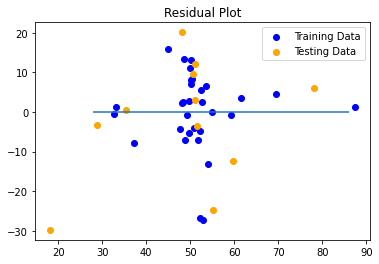

In [6]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")